# Task 3 - Column Transformation

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Downloading Data



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [2]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

In [4]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


### Z Score Data Scaling (aka standardization)

In [16]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(cdf[['ENGINESIZE', 'CO2EMISSIONS']])
cdf_std = std_scale.transform(cdf[['ENGINESIZE', 'CO2EMISSIONS']])

print('Mean after standardization:\nEnginesize={:.2f}, Co2emissions={:.2f}'
      .format(cdf_std[:,0].mean(), cdf_std[:,1].mean()))
print('\nStandard deviation after standardization:\nEnginesize={:.2f}, Co2emissions={:.2f}'
      .format(cdf_std[:,0].std(), cdf_std[:,1].std()))


Mean after standardization:
Enginesize=0.00, Co2emissions=-0.00

Standard deviation after standardization:
Enginesize=1.00, Co2emissions=1.00


/Users/nazribajuri/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nazribajuri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Max Min Data Scaling (aka Normalisation)

In [17]:
minmax_scale = preprocessing.MinMaxScaler().fit(cdf[['ENGINESIZE', 'CO2EMISSIONS']])
cdf_minmax = minmax_scale.transform(cdf[['ENGINESIZE', 'CO2EMISSIONS']])

print('Min-value after min-max scaling:\nEnginesize={:.2f}, Co2emissions={:.2f}'
      .format(cdf_minmax[:,0].min(), cdf_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nEnginesize={:.2f}, Co2emissions={:.2f}'
      .format(cdf_minmax[:,0].max(), cdf_minmax[:,1].max()))

Min-value after min-max scaling:
Enginesize=0.00, Co2emissions=0.00

Max-value after min-max scaling:
Enginesize=1.00, Co2emissions=1.00


/Users/nazribajuri/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Plotting

In [18]:
%matplotlib inline

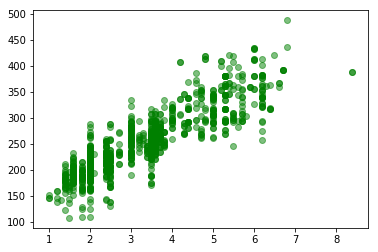

In [34]:
#Plot Real Data

from matplotlib import pyplot as plt

plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'],color='green', label='input scale', alpha=0.5)

Text(0, 0.5, 'CO2 Emissions')

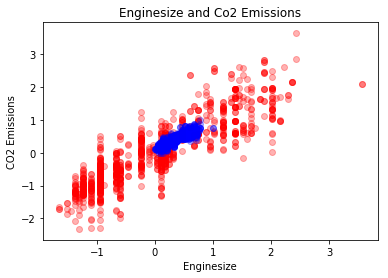

In [38]:
#Plot both the Z score (red) standardization and MaxMin Scale (blue)


plt.scatter(cdf_std[:,0], cdf_std[:,1], color='red',
            label='Standardized [$$N  (\mu=0, \; \sigma=1)$$]', alpha=0.3)

plt.scatter(cdf_minmax[:,0], cdf_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

plt.title('Enginesize and Co2 Emissions')
plt.xlabel('Enginesize')
plt.ylabel('CO2 Emissions')
#plt.legend(loc='upper left')
#plt.grid()


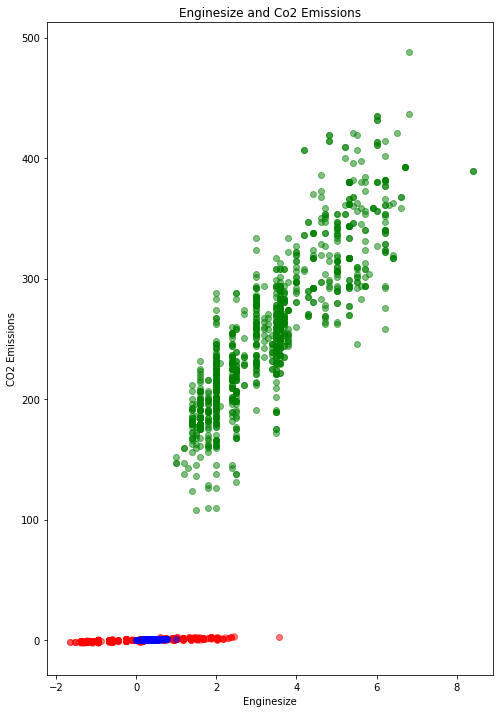

In [39]:
#Plot all data including the scaled ones

def plot():
    plt.figure(figsize=(8,12))

    plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(cdf_std[:,0], cdf_std[:,1], color='red',
            label='Standardized [$$N  (\mu=0, \; \sigma=1)$$]', alpha=0.3)

    plt.scatter(cdf_minmax[:,0], cdf_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Enginesize and Co2 Emissions')
    plt.xlabel('Enginesize')
    plt.ylabel('CO2 Emissions')

plot()
plt.show()